In [46]:
# Module Importations
import datetime
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
print(sns.__version__)

0.10.0


In [2]:
# Custom Module Importations
from Source.data import load_data
from Source.features import data_munging
from Source.visualisation import figures_helper

In [3]:
# Constants
SAVE_FIGURES = False

In [4]:
# Load datasets
df_plant1_gen = load_data.load_data('Plant_1_Generation_Data.csv')
df_plant1_weather = load_data.load_data('Plant_1_Weather_Sensor_Data.csv')

In [5]:
print(df_plant1_gen.describe().T)

               count          mean            std        min           25%  \
PLANT_ID     68778.0  4.135001e+06       0.000000  4135001.0  4.135001e+06   
DC_POWER     68778.0  3.147426e+03    4036.457169        0.0  0.000000e+00   
AC_POWER     68778.0  3.078028e+02     394.396439        0.0  0.000000e+00   
DAILY_YIELD  68778.0  3.295969e+03    3145.178309        0.0  0.000000e+00   
TOTAL_YIELD  68778.0  6.978712e+06  416271.982856  6183645.0  6.512003e+06   

                      50%           75%          max  
PLANT_ID     4.135001e+06  4.135001e+06  4135001.000  
DC_POWER     4.290000e+02  6.366964e+03    14471.125  
AC_POWER     4.149375e+01  6.236187e+02     1410.950  
DAILY_YIELD  2.658714e+03  6.274000e+03     9163.000  
TOTAL_YIELD  7.146685e+06  7.268706e+06  7846821.000  


In [6]:
print(df_plant1_gen.head())

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


In [7]:
print(df_plant1_gen.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None


In [8]:
print(df_plant1_gen)

              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2        

In [9]:
#print(df_plant1_weather.describe().T)

In [10]:
#print(df_plant1_weather)

In [11]:
# Data Munging - Adding DateTime column
df_plant1_gen['DATE_TIME'] = df_plant1_gen.apply(lambda row: data_munging.return_datetime(row['DATE_TIME']), axis = 1)

In [12]:
# Isolate df for short time period
start_date = '14-05-2020'
end_date = '18-05-2020'
boolean_mask = (df_plant1_gen['DATE_TIME'] > start_date) & (df_plant1_gen['DATE_TIME'] <= end_date)

df_plant1_short = df_plant1_gen[boolean_mask]
print(df_plant1_short)

      DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0    2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1    2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2    2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3    2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4    2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   
...         ...       ...              ...       ...       ...          ...   
6017 2020-05-18   4135001  uHbuxQJl8lW7ozc       0.0       0.0          0.0   
6018 2020-05-18   4135001  wCURE6d3bPkepu2       0.0       0.0          0.0   
6019 2020-05-18   4135001  z9Y9gH1T5YWrNuG       0.0       0.0       1871.5   
6020 2020-05-18   4135001  zBIq5rxdHJRwDNY       0.0       0.0          0.0   
6021 2020-05-18   4135001  zVJPv84UY57bAof       0.0       0.0          0.0   

      TOTAL_YIELD  
0       6259559.0  
1       618

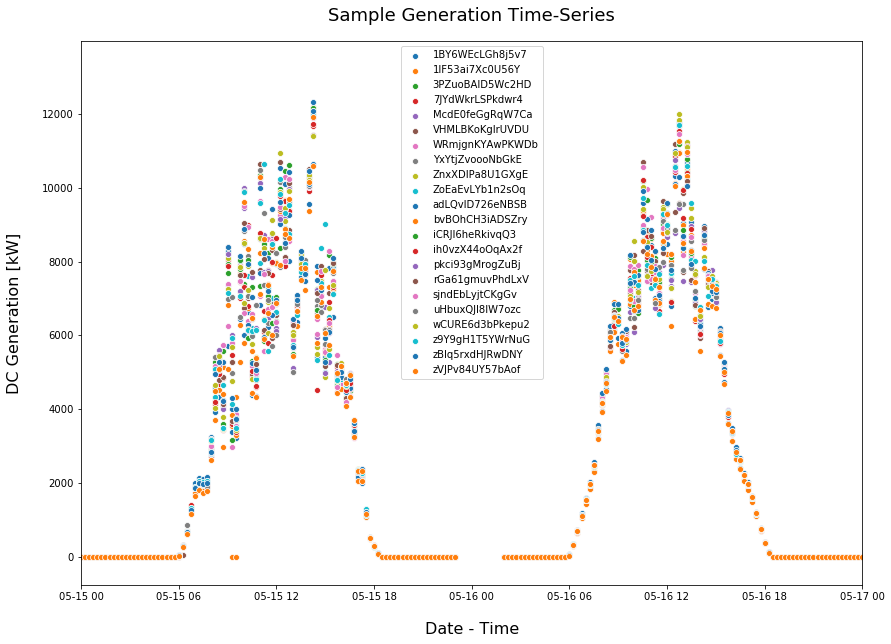

In [13]:
# Plot Generation for multiple cells versus short time
fig, ax = plt.subplots(figsize = (14, 10))

# Generate plot
for SOURCE_KEY, data in df_plant1_short.groupby('SOURCE_KEY'):
    sns.scatterplot(data = data, x = 'DATE_TIME', y = 'DC_POWER', ax = ax, label = SOURCE_KEY)

# Set x limits
ax.set_xlim([datetime.date(2020, 5, 15), datetime.date(2020, 5, 17)])

# Set title, axis, legend
plt.title("Sample Generation Time-Series", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.xlabel("Date - Time", fontsize = 16, labelpad = 20)
plt.ylabel("DC Generation [kW]", fontsize = 16, labelpad = 20)

# Save fig
if SAVE_FIGURES == True: 
    name = 'DC_Generation_Time_Series'
    save_string = figures_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figures_helper.SAVE_FORMAT, dpi = figures_helper.SAVE_DPI)

plt.show()

In [14]:
# Identify unique cell keys in dataset 1
print(df_plant1_gen.SOURCE_KEY.unique())

['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']


In [37]:
# Investigate behaviour of one cell
contains_cell1 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == '1BY6WEcLGh8j5v7']
contains_cell2 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == 'ZnxXDlPa8U1GXgE']
contains_cell3 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == 'pkci93gMrogZuBj']

frames = [contains_cell1, contains_cell2, contains_cell3]

df_cells_gen = pd.concat(frames, ignore_index = True)

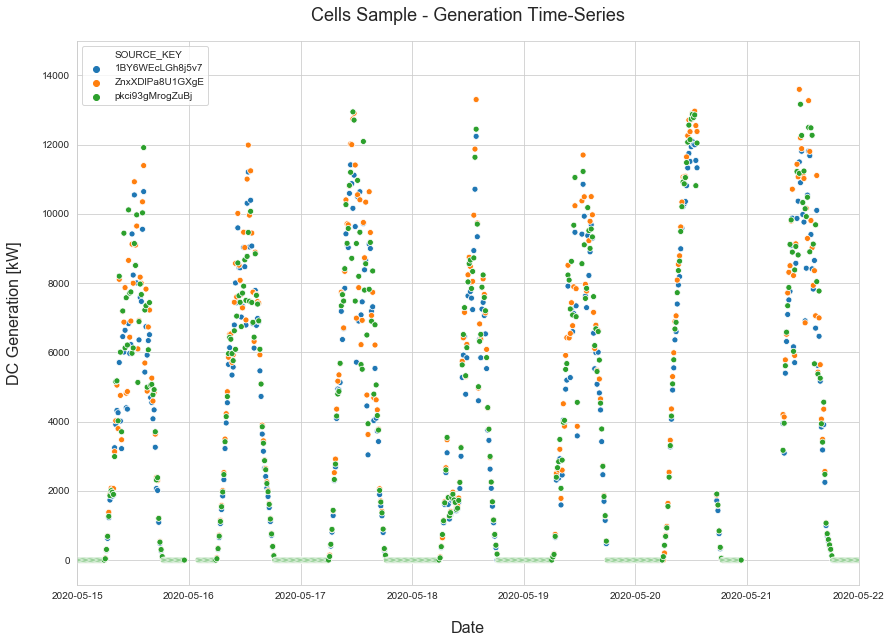

In [50]:
# Plot Generation for one cell as time series
fig, ax = plt.subplots(figsize = (14, 10))

# Generate plot
sns.set_style(style="whitegrid")
sns.scatterplot(data = df_cells_gen, x = 'DATE_TIME', y = 'DC_POWER', ax = ax, hue = 'SOURCE_KEY')

# Set x limits
ax.set_xlim([datetime.date(2020, 5, 15), datetime.date(2020, 5, 22)])

# Set title, axis, legend
plt.title("Cells Sample - Generation Time-Series", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.xlabel("Date", fontsize = 16, labelpad = 20)
plt.ylabel("DC Generation [kW]", fontsize = 16, labelpad = 20)

# Save fig
if SAVE_FIGURES == True: 
    name = 'Cells_Gen_Time_Series'
    save_string = figures_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figures_helper.SAVE_FORMAT, dpi = figures_helper.SAVE_DPI)

plt.show()